In [1]:
from autograd import grad
import autograd.numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')

In [2]:
#!pip3 install --upgrade tensorflow

In [3]:
def leapfrog(q,p, eps, L,grad_V):
    ### Make a half step for momentum at the beginning 
    p = p- (eps/2)*grad_V(q)
    
    for i in range(1,L+1):
        ## make Full Step for q
        
        q = q+eps*p
        
        if i!=L:
            p = p-eps*grad_V(q)
    
    p = p- (eps/2)*grad_V(q)
    
    return q,-p
        
        

In [4]:
def V(x):
    return 0.5*x*x 

In [5]:
def grad_V_1(x):
    return x 

In [6]:
def grad_V_N(x):
    return x +st.norm.rvs(0,4)
    

In [7]:
a = V

In [8]:
def HMC(q0,eps,L,n_sample,n):
    size = n_sample 
    
    if n==1:
        grad_V = grad_V_1
    else:
        grad_V=grad_V_N
    
    ### Make a half step for momentum at the beginning
    q_samples = [q0]
    p_samples =[]
    #samples = np.zeros((size,2))
    for p in st.norm.rvs(0,1,size):
        q =q_samples[-1] #current_q
        current_p= p 
        p = p- (eps/2)*grad_V(q)

        for i in range(1,L+1):
            ## make Full Step for q

            q = q+eps*p

            if i!=L:
                p = p-eps*grad_V(q)

        p = p- (eps/2)*grad_V(q)

        # Negate momentum at end of trajectory to make the proposal symmetric
        p = -p
        ### Evaluate Energies

        current_V = V(q_samples[-1])
        current_K = np.sum(current_p**2)/2.#p.T@p/2
        proposed_V = V(q)
        proposed_K = np.sum(p**2)/2.0

        ## Accept or reject the state
        u = np.log2(np.random.uniform())

        cmpt = (current_V-proposed_V+current_K-proposed_K)

        if u < cmpt:
            q_samples.append(q)
            p_samples.append(p)
        else:
            q_samples.append(q_samples[-1])
            p_samples.append( current_p)
    return np.array(q_samples[1:]), np.array(p_samples)

    

### Examples: cases of 1D oscillator

$V (x)= \frac{1}{2}kx^{2}$, $K = \frac{1}{2}mv^{2}= \frac{p^{2}}{2}$

In [9]:
Q,P = HMC(np.random.randn(),0.1,500,1500,1)

In [10]:
# P = np.array(P)
# Q = np.array(Q)

In [11]:
Q1,P1 = HMC(np.random.randn(),0.1,500,1500,2)

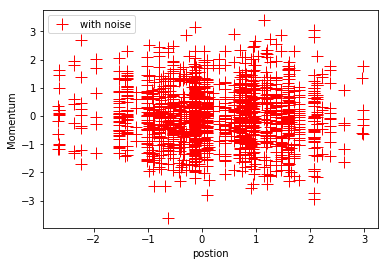

In [22]:
plt.plot(Q1,P1,'r+', linewidth=2, markersize=12)
plt.xlabel('postion')
plt.ylabel('Momentum')
plt.legend(['with noise'])


Text(0, 0.5, 'Momentum')

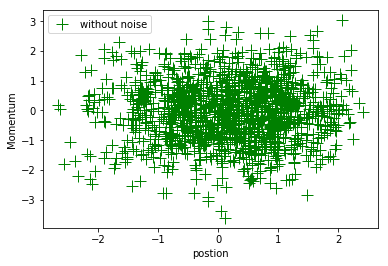

In [13]:
plt.plot(Q,P,'g+', linewidth=2, markersize=12)
#plt.plot(Q1,P1,'r+', linewidth=2, markersize=12)
plt.legend(['without noise','with noise'])
plt.xlabel('postion')
plt.ylabel('Momentum')
#ax.axis('square')
#plt.axis([-1.5, 1.5, -1.5, 1.5])

Text(0, 0.5, 'Position')

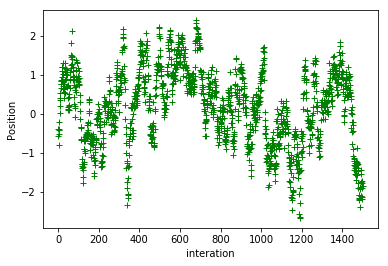

In [14]:
### Position function of the number of iteration.
plt.plot(Q,'g+')
plt.xlabel('interation')
plt.ylabel('Position')

Text(0, 0.5, 'Potential')

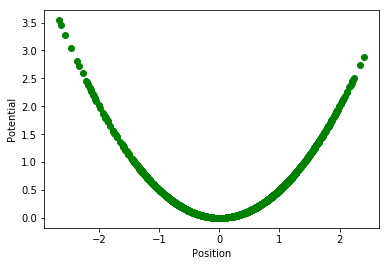

In [15]:
### Plot of the potential as function of postion
plt.plot(Q,V(Q),'go')
plt.xlabel('Position')
plt.ylabel('Potential')

Text(0, 0.5, 'Momentum')

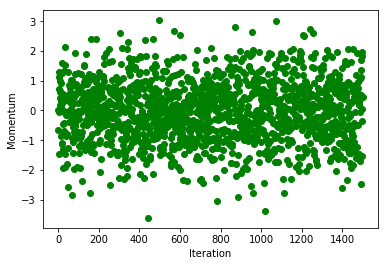

In [16]:
### Plot of the momentum 

plt.plot(P,'go')
plt.xlabel('Iteration')
plt.ylabel('Momentum')